# Lab 3: Clustering Methods

Antonio Debouse, Bodie Franklin, Eric Romero

### Table of Contents:

   * <a href="#BUS"> Businesss Understanding </a>
   * <a href="#DAT1"> Data Understanding 1</a>
   * <a href="#DAT2"> Data Understanding 2</a>
   * <a href="#MOD1"> Modeling and Evaluation 1 </a>
        * <a href="#RF"> Random Forest Model </a>
        * <a href="#KMEANS"> KMeans </a>
        * <a href="#DBSCAN"> DBSCAN </a>
        * <a href="#AGG"> Agglomerative </a>
        * <a href="#GAUS"> Gaussian Mixture </a>
   * <a href="#MOD2"> Modeling and Evaluation 2 </a>
   * <a href="#MOD3"> Modeling and Evaluation 3 </a>
   * <a href="#MOD4"> Modeling and Evaluation 4 </a>
   * <a href="#DEP"> Deployment </a>
   * <a href="#EXC"> Exceptional Work </a>

<a id="BUS"></a>
# Business Understanding

##### Describe the purpose of the data set you selected.

Credit card companies are always in search of better ways to monitor borrowers to determine if the credit card borrower will default on their credit card payments or make them in full. Defaulted credit card payments are often difficult to recoup and create losses for these companies. Defaulting on a payment is defined as not meeting the debt obligation (which is the credit card payment). Our dataset is composed of 24 attributes and 30,000 records that reflect a Taiwanese credit card borrower’s payment history over a six month period.The data was pulled from UCI machine learning repository. The purpose of the dataset is to provide attributes at different points in their payment history to identify if a credit card borrower will default on their payments or pay in full. Since the dataset captures six payment periods, it gives the credit card firm a chance to identify if default will occur or not in various billing cycles.  

##### How will you measure the effectiveness of a good algorithm? 

The effectiveness of a good classification algorithm is one that produces strong accuracy, sensitivity, and specificity scores through cross validation. If an effective classification model can be built, the credit company will have the ability to proactively monitor borrowers in various credit stages.

We will be using clustering methods to see if we can improve the accuracy of our best model from Lab 2 which was the Random Forest model. To measure the effectiveness of each cluster method we will look at the silhouette score which will measure the mean distances between the clusters that are identified in each method. Silhouette values near 1 will indicate more distinct clusters which should improve the base model. Low silhouette scores will suggest that the identified clusters overlap with each other and will do little to enchance the model.

##### Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?

We chose to use a Shuffle Split 10-cross validation method in which a training and test set is created by randomly sampling from the whole data set over 10 iterations. Given the significant size of our data set we only need to use some of the data to train the algorithm providing us with the benefit of reducing the cross validation time.

Oversampling was also used to limit the potential bias that would exist in our target attribute being heavy skewed towards clients that did not default.

The significance of identifying default or not will allow the credit card to minimize their losses. If early default identification occurs, the credit card company can reduce the borrower’s credit limits or preemptively work with the borrower to create new repayment plans. Both outcomes will help the credit company reduce their losses that would occur if no action were taken.  

<a id="DAT1"></a>
# Data Understanding 1

##### Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

In [1]:
import pandas as pd
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

DataMeaningType = pd.DataFrame(
{'Attribute': ['LIMIT_BAL', 'Gender:', 'Education:','Marital status:','Age:','PAY_0 to PAY6:','BILL_AMT1 to BILL_AMT6:','PAY_AMT1 to PAY_AMT6:','Default payment next month:'],
'Data Type ': ['Nomminal scale', 'Categorical', 'Ordinal scale','Categorical scale','Numerical/Nomminal','Categorical scale','Nominal scale','Nominal scale','Categorical scale'],
'Description': ['Combined total of credit (amount of money) given to the individual borrower and their family.', '1 represents male and 2 represents female.', '1 represents the highest level of education and 4 would be the lowest. 1 = graduate school, 2 = university, 3 = high school and 4 = others.','1 = married, 2 = single, 3 = others. Value 0 is undefined.','Measures how old a borrower is.','Categorical scale','These attributes describe the past monthly payment status of each made. For example, PAY_0 represents the payment status in September 2005 and PAY_6 represents the payment status in April 2005. -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.','This value represents the amount of the credit card bill paid in each respective month','1 represents a default or missed payment. 0 represents payment made.']})
pd.set_option("max_colwidth", 3000)

DataMeaningType 

Attribute          Data Type   \
0                    LIMIT_BAL      Nomminal scale   
1                      Gender:         Categorical   
2                   Education:       Ordinal scale   
3              Marital status:   Categorical scale   
4                         Age:  Numerical/Nomminal   
5               PAY_0 to PAY6:   Categorical scale   
6      BILL_AMT1 to BILL_AMT6:       Nominal scale   
7        PAY_AMT1 to PAY_AMT6:       Nominal scale   
8  Default payment next month:   Categorical scale   

                                                                                                                                                                                                                                                                                                                                                                   Description  
0                                                                                                                                                                                                                                                                                Combined total of credit (amount of money) given to the individual borrower and their family.  
1                                                                                                                                                                                                                                                                                                                                   1 represents male and 2 represents female.  
2                                                                                                                                                                                                                                  1 represents the highest level of education and 4 would be the lowest. 1 = graduate school, 2 = university, 3 = high school and 4 = others.  
3                                                                                                                                                                                                                                                                                                                   1 = married, 2 = single, 3 = others. Value 0 is undefined.  
4                                                                                                                                                                                                                                                                                                                                              Measures how old a borrower is.  
5                                                                                                                                                                                                                                                                                                                                                            Categorical scale  
6  These attributes describe the past monthly payment status of each made. For example, PAY_0 represents the payment status in September 2005 and PAY_6 represents the payment status in April 2005. -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.  
7                                                                                                                                                                                                                                                                                       This value represents the amount of the credit card bill paid in each respective month  
8                                                                                                                                                              

* The table above describes the attributes in detail and what the values represent.

More detailed explaination of attributes can be found at: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

* We are removing the ambiguous values from attributes that were determined to not greatly impact the classification task.

### Data Quality

##### Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?

#### Import and Adjustment of Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('credit_card.csv')

#Deleting ID as useless variable
del df['ID']

#Dropping education variables 0,5,6 & Marriage status 0
#since we don't know what these are per UCI page and these are such a small portion of data less than 3%

df_new = df[(df.EDUCATION !=0)&(df.EDUCATION !=5) &
            (df.EDUCATION !=6) & (df.MARRIAGE!= 0)]



#Creating Backup for reference. 
df_base = df_new

df_base_education = pd.DataFrame(df_new,columns = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0',
       'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2',
       'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',
       'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default_payment_next_month'])


The data that was pulled was fairly clean to start when reviewing this data. However we did notice some factors that were not in the defined range of the data. This was apparent in categorical columns of Education and Marriage. Education had 3 additional values of 0, 5, 6  which occurred 345 times out of the 30,000 values in this column. Marriage had a value of 0 which occurred 54 times out of the 30,000 values. We addressed both of these ambiguous values in the data by recoding them as "other" category for each respective attribute. The assumption behind this was that they were small amounts of data that did not represent the major categories and therefore could be moved into the "other" category with little effect on the overall data set.

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default_payment_next_month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 24 columns]

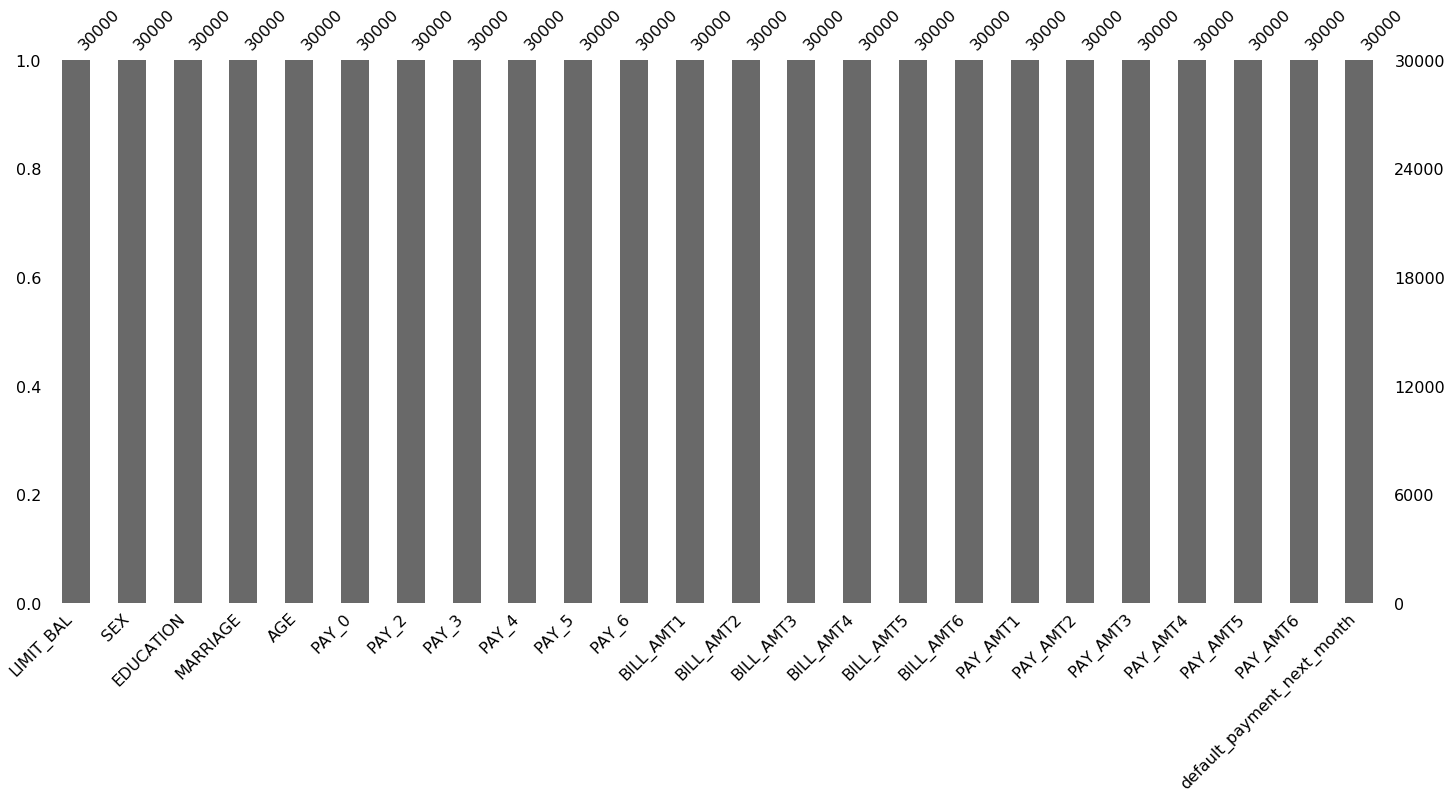

In [4]:
import pandas as pd 
import missingno as msno
msno.bar(df)

# First look at the Data Set 
df.head()

In [5]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

Based on the above chart there are no missing values for any attribute in the data set.

<a id="DAT2"></a>
# Data Understanding 2

### Visualization of Important Attributes

<AxesSubplot:>

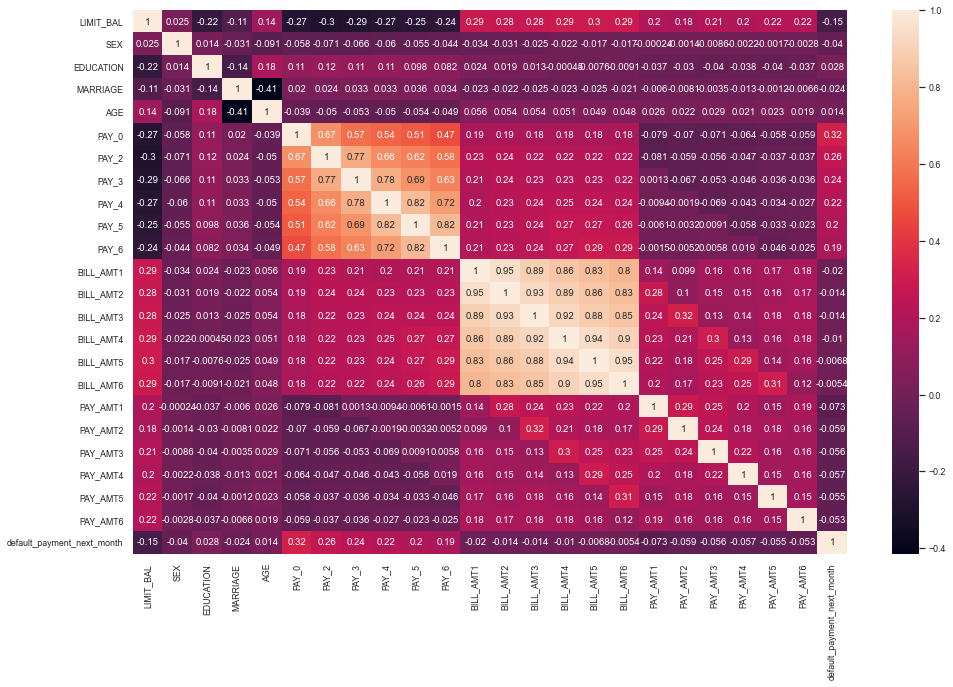

In [112]:
sns.set(font_scale=0.8)
corrMatrix = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True)

Utilizing a correlation plot we first identified attributes that showed strong relationships to those that defaulted. This was the highest for history of past payments which recorded data on payment delays before defaulting. Payment delay data specifically at the earlier time frames showed the highest correlation to default data. A graph of the correlation matix is seen above. When reviewing the graph we identified that only Pay 0 through Pay 6 had a high correlation to the variable of interest of default payment next month.  This finding is consistent with our analysis of prepayments. If a borrower prepays which will be reflected in variables PAY 0 to PAY 6, then the borrower isn’t defaulting and a deferred amount increases the likelihood that the borrower defaults.

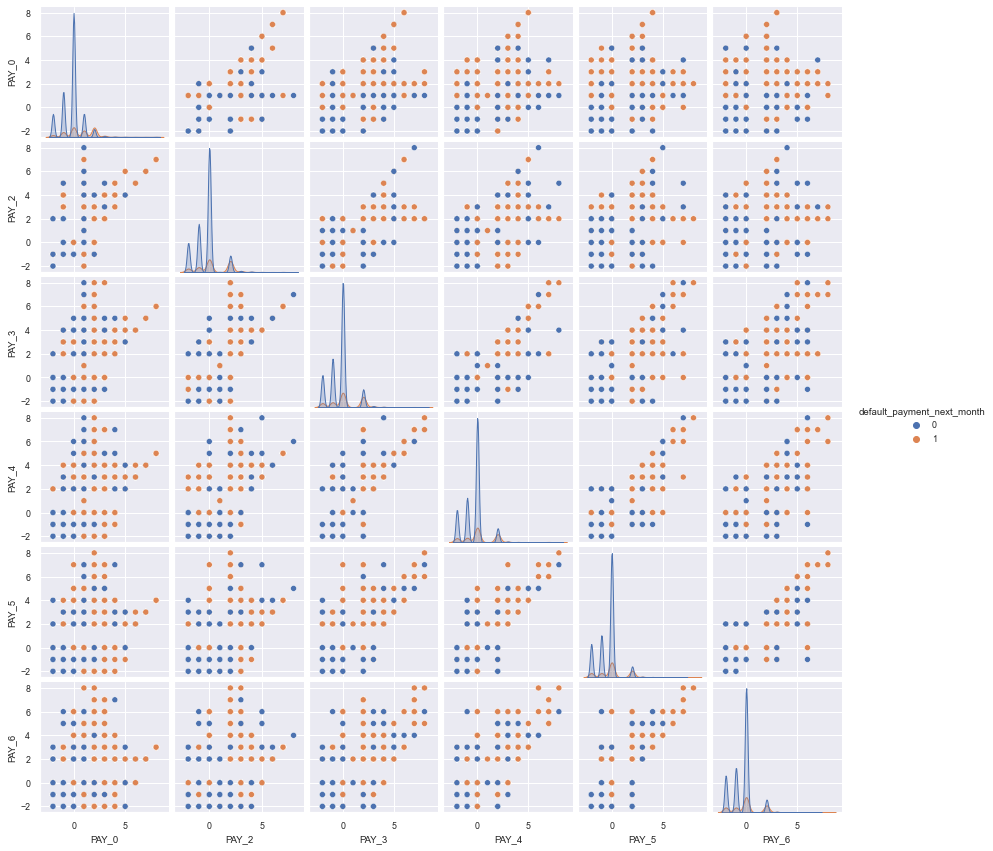

In [114]:
# pairwise plots of features
df_sub_PAY = df[["default_payment_next_month","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]] #splitting attributes based on high correlation
sns.pairplot(df_sub_PAY, hue="default_payment_next_month", height=2)
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (20,20)

The scatterplot above shows correlations between PAY 0 – 6 variables with   each respective PAY attribute.  If a borrower prepays or defers in a previous month, the borrower is likely to repeat the payment history in the next month. This statement is visually apparent since non defaulters are experiencing a negative correlation. In PAY0 vs PAY2, we see that borrowers who prepaid have a negative correlation and thus did not default since they are prepaying. Borrowers who have a positive correlation between each month which indicates they deferred have a higher chance of defaulting.

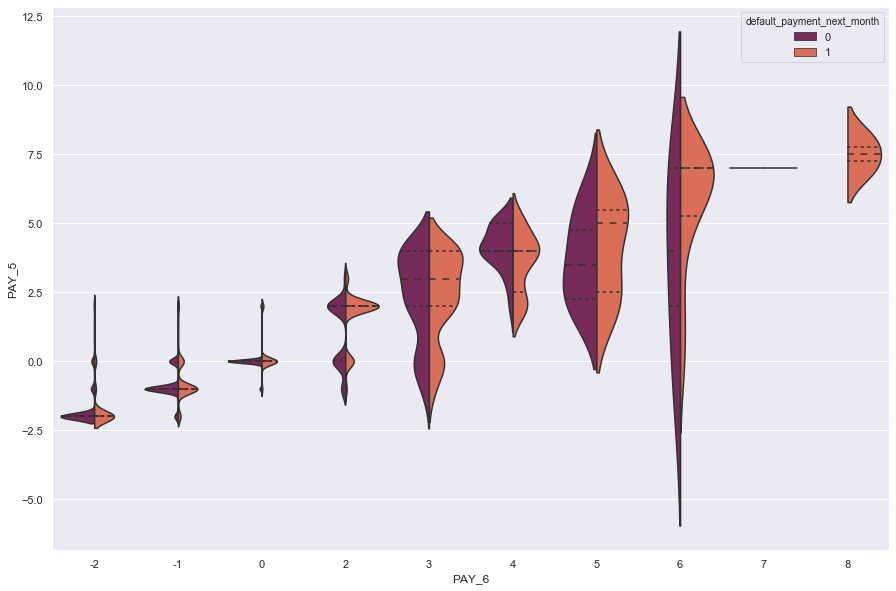

In [8]:
# Violin Plot of Pay 6 and Pay 5
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(x="PAY_6", y="PAY_5", hue="default_payment_next_month", data=df, 
               split=True, inner="quart",palette='rocket')

Examining the differences in payment history was best viewed in a violin plot comparison. The plot above clearly indicates an increased likelihood of default for increased payment delays made near the end of the 6 month period. This makes sense logically as delaying payments after having made several already would indicate struggling to make payments and therefore also likely to default.

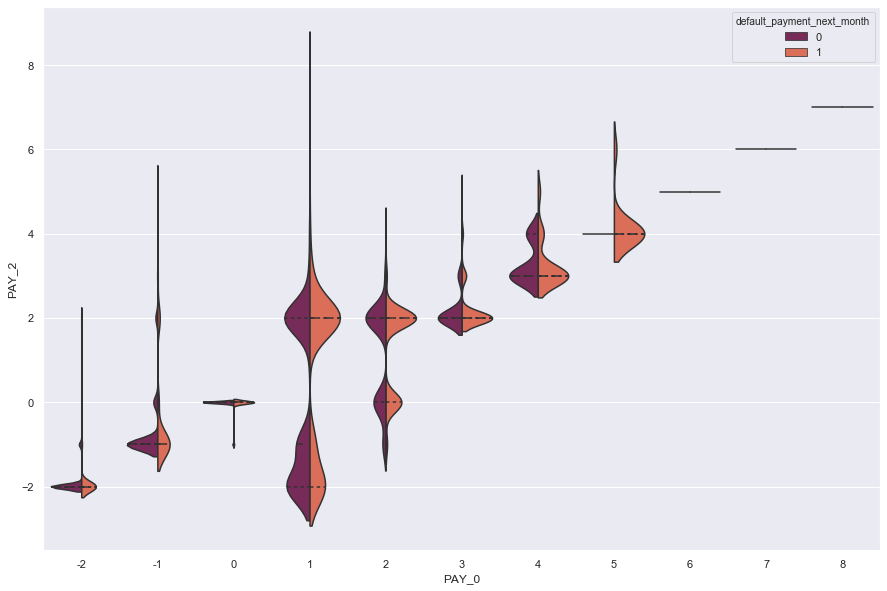

In [9]:
f, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(x="PAY_0", y="PAY_2", hue="default_payment_next_month", data=df, 
               split=True, inner="quart",palette='rocket')

Similarly to the previous plot, this plot shows a payment delay made at the start or 2nd repayment will likely immediately lead to a client defaulting as would be expected.

<a id="MOD1"></a>
# Modeling and Evaluation 1
### 	Train and adjust parameters

* Cluster Analysis
    * Perform cluster analysis using several clustering methods
    * How did you determine a suitable number of clusters for each method?
    * Use internal and/or external validation measures to describe and compare the clusterings and the clusters (some visual methods would be good).
    * Describe your results. What findings are the most interesting and why?

**Task: Payment Default**
* For this classification we are trying to predict whether payment default will occur or not. Accuracy would work best for this task as it will represent both those that defaulted and did not default. Knowing the attributes of those that would default is useful for knowing what clients to avoid, while knowing the attributes of those that do not default would give insight into what type of clients to pursue. 
* Sensitivity will represents our models ability to correctly identify the true positive defaults. 
* Specificity will be useful for measuring our models ability to correctly identify those that did not default.
* We also analyzed AUC under the ROCs to check that our prediction models are reaching an acceptable accuracy of distinguishing between the different classes.
* The effectiveness of a good classification algorithm is one that produces strong accuracy, sensitivity, and specificity scores through cross validation. If an effective classification model can be built, the credit company will have the ability to proactively monitor borrowers in various credit stages. The significance of identifying default or not will allow the credit card to minimize their losses. If early default identification occurs, the credit card company can reduce the borrower’s credit limits or preemptively work with the borrower to create new repayment plans. Both outcomes will help the credit company reduce their losses that would occur if no action were taken.


Based on the results from Lab 2, the Random Forest model outperformed other models for predicting payment default and will therefore be used as our base model to measure improvements using clustering in the following 4 methods. 

#### Clustering Methods: 

##### KMeans:
* The K-means algorithm creates random centroids within the data as a starting point and then begins an iterative process to find the optimal positions and number of centroids that fit the data.

##### DBSCAN:
* Density-based spatial clustering of applications with noise (DBSCAN) is a clustering algorithm based on densities within the data. Points with lots of other points near them are grouped together while more distant points like outliers are marked outside of the clusters as noise in the data.

##### Agglomerative
* In this clustering algorithm the data is formed into clusters in a hierarchical order. This is based on the idea that data points that are closer together are more related than those that are far away from each other. Each observation in the data begins as its own cluster and then is merged together into pairs based on their distances from each other up to a set maximum distance.

##### Gaussian Mixture:
* A Gaussian mixture model that identifies that amount of clusters in the data by fitting "Gaussian" shapes over the data based on certain parameters such as using means to determine centers. There are different types of covariance that can be applied that define the width of the ellipsoids it creates. A mixing probability is used to the size of the gaussian function which is dependent on the dimensionality of the data points.

For each method described above we used a silhouette score to measure the effectiveness as explained in Business Understanding. This value determined the best clustering parameters for each respective method. We then ran those parameters through our base random forest model to look for improvements in the accuracy metrics


#### Training-Test Split

In [3]:
%%time
#Code utilized  from https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
from imblearn.over_sampling import SMOTE
from collections import Counter

if 'default_payment_next_month' in df_new:
    y = df_new['default_payment_next_month'].values
    del df_new['default_payment_next_month']
    X = df_new.values

#Saving out the column names , so we can make dataframes later on 
col = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0',
       'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2',
       'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',
       'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

os = SMOTE(random_state=99)


#Our new datasets to use will be X_res,y_res
#X_res is the resample dataset that is now more balance
#Y_res is the target column that is now more balance.

X_res, y_res = os.fit_resample(X, y)

#Previous class distribtion
counter = Counter(y)
print("Previous class breakdown:",counter)

# summarize the new class distribution
counter_res = Counter(y_res)
print("OS_breakout",counter_res)

#This is the base dataset created for task #2 
if 'EDUCATION' in df_base_education:
    Education_Level = df_base_education['EDUCATION'].values
    del df_base_education['EDUCATION']
    Education_pred = df_base_education.values

df_OS = pd.DataFrame(X_res,columns = col)

Previous class breakdown: Counter({0: 22996, 1: 6605})
OS_breakout Counter({1: 22996, 0: 22996})
Wall time: 2.28 s


Our dataset was initially highly imbalanced toward non-defaulters which would make classifcations for our models difficult. To overcome this shortfall, we oversampled the minority class by utilizing the SMOTE technique from imblearn package. SMOTE works by creating synthetic copies of our minority class examples until there is an equal amount of them compared to the majority class examples. As seen above this was initially only 6605 defaults compared to 22996 non-defaults, using the technique raised the amount of default examples to the same count. Now the models will less favor one class over the other and potentially produce higher prediction metrics such as accuracy, sensitivity and specificity. The OS dataset used for the model will be broken into the arrays X_res , y_res.

* The final dataset used for this is an oversampled df_OS, the oversampled arrays are X_res and y_res. Our target variable was default_payment_next_month which was removed from the dataset for classification task 1. Seen below, this data set contains 23 features which were oversampled to 45992 observations for task 1 models due to the imbalances in our target variable. There arrays were unscaled until ran through the pipeline as part of the model building.

### Creating Seed and CV object

In [4]:
%%time
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

import random
#Setting Seed
#will use this in CV portion
random.seed(10)
seed = random.randint(1,500)
print("seed is:",seed)


#Creating the Task 1 CV
num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         random_state = seed,
                         test_size  = 0.2)

print(cv_object)

seed is: 293
ShuffleSplit(n_splits=10, random_state=293, test_size=0.2, train_size=None)
Wall time: 998 µs


In the above section, we are creating the CV object that we will use to test the metrics of the model. The seed is set at 293  to make similar comparisons. We used an 80/20 split for this task.

<a id="RF"></a>
### Random Forest Model

In [5]:
%%time
from sklearn.model_selection import train_test_split
#reorg the dataframe X_res then continue with the process

X_rs = pd.DataFrame(data=X_res,columns=col)

imp_col = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_5',
       'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1', 'PAY_AMT2']

X_rs  = X_rs[imp_col]

y_rs = pd.DataFrame(data=y_res,columns=['default_payment_next_month'])

X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size = 0.20)

X_rs = X_rs.values
y_rs = y_rs['default_payment_next_month'].values

Wall time: 9.97 ms


In [7]:
%%time
from sklearn.model_selection import ShuffleSplit
import imblearn
import numpy as np

#Random Forest
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt
from sklearn.pipeline import Pipeline


std_scl = StandardScaler()
rf_clf = RandomForestClassifier()

piped_object = Pipeline([('scale', std_scl),  
                         ('Random_Forest', rf_clf)]) 


Iteration = []
Accuracy = []
Sensitivity = []
Specificity = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X_rs,y_rs)):
    piped_object.fit(X_rs[train_indices],y_rs[train_indices])  # train object
    y_hat = piped_object.predict(X_rs[test_indices]) # get test set precitions
    
    cm1 = mt.confusion_matrix(y_rs[test_indices],y_hat)
    
    Iteration.append(iter_num)
    Accuracy.append(mt.accuracy_score(y_rs[test_indices],y_hat))
    Sensitivity.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    
rf_base_results = pd.DataFrame({'Iteration':Iteration,'Accuracy': Accuracy,'Sensitivity':Sensitivity,
                                'Specificity':Specificity},columns = ['Iteration','Accuracy','Sensitivity','Specificity'])


rf_base_results

Wall time: 51.6 s


Iteration  Accuracy  Sensitivity  Specificity
0          0  0.813458     0.831995     0.794861
1          1  0.809762     0.818632     0.800703
2          2  0.810740     0.827571     0.793483
3          3  0.810958     0.823478     0.798341
4          4  0.813349     0.827215     0.799785
5          5  0.819872     0.833768     0.805960
6          6  0.813241     0.834709     0.791730
7          7  0.807479     0.827891     0.787658
8          8  0.809001     0.826230     0.792124
9          9  0.810305     0.825736     0.794972

The above table displays the metrics for our best model from Lab 2 for which each clustering method will be applied and compared to see what improvements can be obtained. Accuracy will measure our models ability to correctly identify whether the client will or will not default. Sensitivity will tell us how many clients were correctly identified as having defaulted while Specificity measures correct predictions on those that did not default

<a id="KMEANS"></a>
### KMeans Clustering

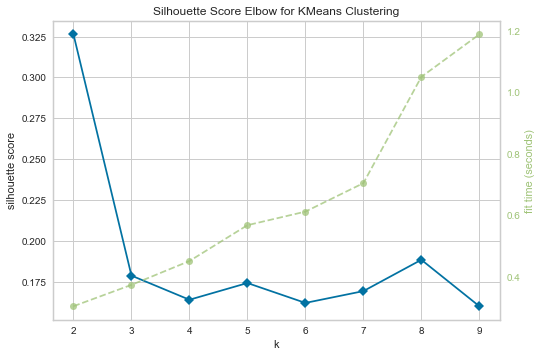

Optimal number of clusters based on silhouette score: [2]
Wall time: 1min 55s


In [49]:
%%time
#Utlized code from  
#https://towardsdatascience.com/k-means-dbscan-gmm-agglomerative-clustering-mastering-the-popular-models-in-a-segmentation-c891a3818e29
#https://github.com/IDB-FOR-DATASCIENCE/Segmentation-Modelling/blob/main/Segmentation%20Notebook%20_Final.ipynb
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

centers = list(range(2,10))
scaled_X_train = std_scl.fit_transform(X_train)

model = KMeans(init='k-means++',random_state=seed)

visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(scaled_X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

In the visual above we see that for the KMeans algorithm 2 clusters was significantly better with a silhouette score at approximately 0.326. K values were kept within a range of 2-9 as our computer lacked the computing power to go much beyond that. There was an immediate drop in score after 2 clusters with little to no improvement or change for the selected range suggesting 
more clusters would do little to improve the silhouette score. This also is fits with what is known as the elbow method in which the chart resembles an arm like shape indicating the best fit is at the point of inflection on the curve (the "elbow").

In [33]:
%%time
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Iteration = []
Accuracy = []
Sensitivity = []
Specificity = []

X1 = X_rs
cls = KMeans(n_clusters=2, init='k-means++',random_state=seed)


cls.fit(X1)
newfeature = cls.labels_ 

y = y_rs
X = X_rs

X = np.column_stack((X,pd.get_dummies(newfeature)))




std_scl = StandardScaler()
rf_clf = RandomForestClassifier(bootstrap= 'bool', criterion= 'gini', max_depth= 100, 
                           max_features='sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators = 100)

piped_object = Pipeline([('scale', std_scl),  
                         ('Random_Forest', rf_clf)]) 

silhouette_score = []
Iteration = []
Accuracy = []
Sensitivity = []
Specificity = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    piped_object.fit(X[train_indices],y[train_indices])  # train object
    y_hat = piped_object.predict(X[test_indices]) # get test set precitions
    
    cm1 = mt.confusion_matrix(y[test_indices],y_hat)
    
    Iteration.append(iter_num)
    Accuracy.append(mt.accuracy_score(y[test_indices],y_hat))
    Sensitivity.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    
    
rf_Kmeans_results = pd.DataFrame({'Iteration':Iteration,'Accuracy': Accuracy,'Sensitivity':Sensitivity,
                                'Specificity':Specificity},columns = ['Iteration','Accuracy','Sensitivity','Specificity'])



rf_Kmeans_results

Wall time: 43.9 s


Iteration  Accuracy  Sensitivity  Specificity
0          0  0.815197     0.828305     0.802047
1          1  0.810197     0.816050     0.804219
2          2  0.810849     0.830792     0.790401
3          3  0.809545     0.823045     0.795941
4          4  0.812697     0.823478     0.802151
5          5  0.821720     0.837679     0.805743
6          6  0.815958     0.833406     0.798477
7          7  0.807370     0.829656     0.785730
8          8  0.809110     0.824473     0.794061
9          9  0.809653     0.820502     0.798873

In the above table we see the results of the KMeans algorithm applied to the Random Forest model with 2 clusters. This had little to no change to the accuracy, sensitivity or specificity indicating it did not improve the functionality of the model.

<a id="DBSCAN"></a>
### DBSCAN

Optimal number of min_samples based on silhouette score: [8]
Wall time: 6min 52s


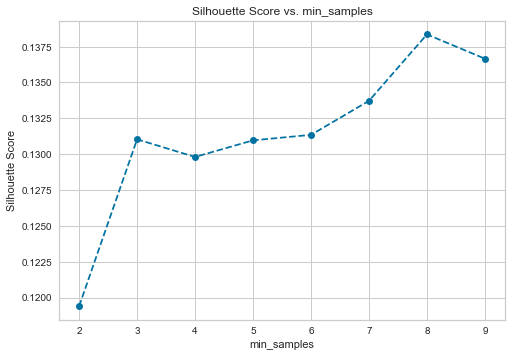

In [45]:
%%time
#Utlized code from  
#https://towardsdatascience.com/k-means-dbscan-gmm-agglomerative-clustering-mastering-the-popular-models-in-a-segmentation-c891a3818e29
#https://github.com/IDB-FOR-DATASCIENCE/Segmentation-Modelling/blob/main/Segmentation%20Notebook%20_Final.ipynb

from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN

scaled_X_train = std_scl.fit_transform(X_train)
centers = list(range(2,10))

def get_dbscan_score(data, center):
    '''
    
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Silhouette Score for DBSCAN
    '''
    #instantiate kmeans
    dbscan = DBSCAN(eps= 1.9335816413107338, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(scaled_X_train)
    
    # Calculate Silhoutte Score

    score = silhouette_score(scaled_X_train, model.labels_, metric='euclidean')
    
    return score

scores = []


for center in centers:
    scores.append(get_dbscan_score(scaled_X_train, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. min_samples');

df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_samples based on silhouette score:', df4['min_samples'].tolist())

In the visual above we see that for the DBSCAN algorithm, 8 clusters had the best silhouette score at approximately 0.138. K values were again kept within a range of 2-9 due to computing power. We see a drop in score at 9 clusters though overall the silhouette scores for each K was relatively low indicating high amounts of overlap in each case.

In [48]:
%%time
from sklearn.cluster import DBSCAN

X1 = X_rs
cls = DBSCAN(eps=1.9335816413107338, min_samples=8)

cls.fit(X1)
newfeature = cls.labels_ 

y = y_rs
X = X_rs

X = np.column_stack((X,pd.get_dummies(newfeature)))


std_scl = StandardScaler()
rf_clf = RandomForestClassifier(bootstrap= 'bool', criterion= 'gini', max_depth= 100, 
                           max_features='sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators = 100)

piped_object = Pipeline([('scale', std_scl),  
                         ('Random_Forest', rf_clf)]) 


Iteration = []
Accuracy = []
Sensitivity = []
Specificity = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    piped_object.fit(X[train_indices],y[train_indices])  # train object
    y_hat = piped_object.predict(X[test_indices]) # get test set precitions
    
    cm1 = mt.confusion_matrix(y[test_indices],y_hat)
    
    Iteration.append(iter_num)
    Accuracy.append(mt.accuracy_score(y[test_indices],y_hat))
    Sensitivity.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    
    
rf_DB_results = pd.DataFrame({'Iteration':Iteration,'Accuracy': Accuracy,'Sensitivity':Sensitivity,
                                'Specificity':Specificity},columns = ['Iteration','Accuracy','Sensitivity','Specificity'])



rf_DB_results

Wall time: 43.7 s


Iteration  Accuracy  Sensitivity  Specificity
0          0  0.814002     0.829607     0.798345
1          1  0.811066     0.819707     0.802241
2          2  0.812480     0.830578     0.793923
3          3  0.809653     0.824561     0.794631
4          4  0.813784     0.823698     0.804086
5          5  0.820089     0.838983     0.801175
6          6  0.814762     0.835143     0.794342
7          7  0.807805     0.831421     0.784873
8          8  0.809218     0.820958     0.797719
9          9  0.813023     0.826827     0.799306

In the above table we see the results of the DBSCAN algorithm applied to the Random Forest model with 8 clusters. This had little to no change to the accuracy, sensitivity or specificity indicating it did not improve the functionality of the model.

<a id="AGG"></a>
### Agglomerative Clustering

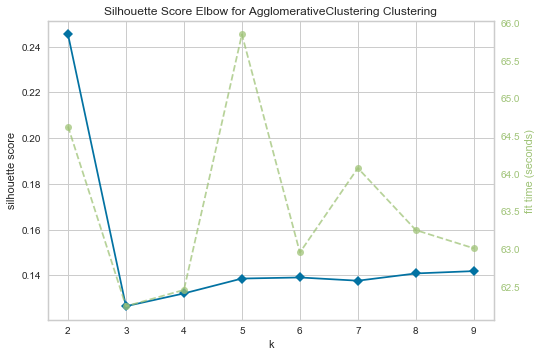

Optimal number of clusters based on silhouette score: [2]
Wall time: 10min 19s


In [41]:
%%time

#Utlized code from  
#https://towardsdatascience.com/k-means-dbscan-gmm-agglomerative-clustering-mastering-the-popular-models-in-a-segmentation-c891a3818e29
#https://github.com/IDB-FOR-DATASCIENCE/Segmentation-Modelling/blob/main/Segmentation%20Notebook%20_Final.ipynb
from yellowbrick.cluster import KElbowVisualizer

centers = list(range(2,10))
scaled_X_train = std_scl.fit_transform(X_train)

model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(scaled_X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

In the visual above we see that for the Agglomerative algorithm 2 clusters was significantly better with a silhouette score at approximately 0.243. There was an immediate drop in score after 2 clusters with little to no improvement or change for the selected range. This was seen previously using the elbow method indicating this as an optimal value.

In [43]:
%%time
from sklearn.cluster import AgglomerativeClustering

X1 = X_rs
cls = AgglomerativeClustering(n_clusters=2, linkage=ward)


cls.fit(X1)
newfeature = cls.labels_ 

y = y_rs
X = X_rs

X = np.column_stack((X,pd.get_dummies(newfeature)))


std_scl = StandardScaler()
rf_clf = RandomForestClassifier(bootstrap= 'bool', criterion= 'gini', max_depth= 100, 
                           max_features='sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators = 100)

piped_object = Pipeline([('scale', std_scl),  
                         ('Random_Forest', rf_clf)]) 


Iteration = []
Accuracy = []
Sensitivity = []
Specificity = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    piped_object.fit(X[train_indices],y[train_indices])  # train object
    y_hat = piped_object.predict(X[test_indices]) # get test set precitions
    
    cm1 = mt.confusion_matrix(y[test_indices],y_hat)
    
    Iteration.append(iter_num)
    Accuracy.append(mt.accuracy_score(y[test_indices],y_hat))
    Sensitivity.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    
    
rf_AGG_results = pd.DataFrame({'Iteration':Iteration,'Accuracy': Accuracy,'Sensitivity':Sensitivity,
                                'Specificity':Specificity},columns = ['Iteration','Accuracy','Sensitivity','Specificity'])



rf_AGG_results

Wall time: 6min 16s


Iteration  Accuracy  Sensitivity  Specificity
0          0  0.814328     0.826568     0.802047
1          1  0.811284     0.821213     0.801143
2          2  0.813132     0.834872     0.790841
3          3  0.807262     0.821529     0.792885
4          4  0.813132     0.824357     0.802151
5          5  0.821068     0.835506     0.806613
6          6  0.813675     0.830799     0.796518
7          7  0.808023     0.826787     0.789801
8          8  0.808131     0.822496     0.794061
9          9  0.809653     0.822246     0.797139

In the above table we see the results of the Agglomerative algorithm applied to the Random Forest model with 2 clusters. This had little to no change to the accuracy, sensitivity or specificity indicating it did not improve the functionality of the model.

<a id="GAUS"></a>
### Gaussian Mixture Model

In [51]:
%%time
#Utlized code from  
#https://towardsdatascience.com/k-means-dbscan-gmm-agglomerative-clustering-mastering-the-popular-models-in-a-segmentation-c891a3818e29
#https://github.com/IDB-FOR-DATASCIENCE/Segmentation-Modelling/blob/main/Segmentation%20Notebook%20_Final.ipynb
from sklearn.mixture import GaussianMixture

centers = list(range(2,10))
scaled_X_train = std_scl.fit_transform(X_train)

n_components = range(2, 10)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov,random_state = seed)
        model = gmm.fit(scaled_X_train)
        model_2 = model.predict(scaled_X_train)
        score_s = silhouette_score(scaled_X_train, model_2, metric='euclidean')
        score.append((cov,n_comp,score_s))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]
score_2.head(n=2)

Wall time: 8min 8s


Covariance_Type  N_Components  Silhouette_Score
0       spherical             2          0.437779

For the Gaussian Mixture algorithm we first determined the best covariance type based on the silhouette score generated which as seen above was spherical type at 2 clusters with a silhouette score of 0.438.

Highest Score: 0.43782802444925784 at K = 2


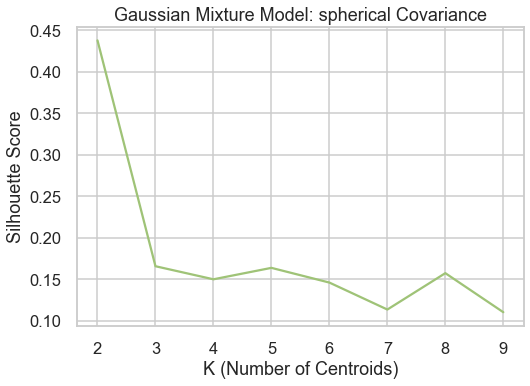

Wall time: 1min 52s


In [54]:
%%time
# Gassian Mixture Model covariance type: spherical
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
scaled_X_train = std_scl.fit_transform(X_train)

scores = []
K = range(2,10)
for k in K:
    g_co = GaussianMixture(n_components=k, covariance_type='spherical')
    g_fit = g_co.fit(scaled_X_train)
    g_pred = g_fit.predict(scaled_X_train) 
    sc = silhouette_score(scaled_X_train, g_pred)
    scores.append(sc)
    
print("Highest Score:", max(scores), "at K =", scores.index(max(scores))+2) #starting at k=2

sns.set_context("talk")
plt.plot(K, scores, "-g")
plt.xlabel('K (Number of Centroids)')
plt.ylabel('Silhouette Score')
plt.title('Gaussian Mixture Model: spherical Covariance')
plt.show()


In the visual above we see that for the Gaussian Mixture algorithm, 2 clusters again identified as significantly better with a silhouette score at approximately 0.438. There was a similar immediate drop in score after 2 clusters with little to no improvement or change for the selected range. This was seen previously using the elbow method indicating this as an optimal value.

In [62]:
%%time
from sklearn.mixture import GaussianMixture


X1 = X_rs
cls = GaussianMixture(n_components=2, covariance_type='spherical')



newfeature = cls.fit_predict(X1)

y = y_rs
X = X_rs

X = np.column_stack((X,pd.get_dummies(newfeature)))


std_scl = StandardScaler()
rf_clf = RandomForestClassifier(bootstrap= 'bool', criterion= 'gini', max_depth= 100, 
                           max_features='sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators = 100)

piped_object = Pipeline([('scale', std_scl),  
                         ('Random_Forest', rf_clf)]) 


Iteration = []
Accuracy = []
Sensitivity = []
Specificity = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    piped_object.fit(X[train_indices],y[train_indices])  # train object
    y_hat = piped_object.predict(X[test_indices]) # get test set precitions
    
    cm1 = mt.confusion_matrix(y[test_indices],y_hat)
    
    Iteration.append(iter_num)
    Accuracy.append(mt.accuracy_score(y[test_indices],y_hat))
    Sensitivity.append(cm1[0,0]/(cm1[0,0]+cm1[0,1]))
    Specificity.append(cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    
    
rf_GMM_results = pd.DataFrame({'Iteration':Iteration,'Accuracy': Accuracy,'Sensitivity':Sensitivity,
                                'Specificity':Specificity},columns = ['Iteration','Accuracy','Sensitivity','Specificity'])



rf_GMM_results

Wall time: 43.2 s


Iteration  Accuracy  Sensitivity  Specificity
0          0  0.814436     0.830258     0.798563
1          1  0.810197     0.817126     0.803120
2          2  0.810197     0.826283     0.793703
3          3  0.808892     0.824345     0.793322
4          4  0.812914     0.822159     0.803871
5          5  0.819763     0.834637     0.804873
6          6  0.813349     0.830582     0.796083
7          7  0.804435     0.822374     0.787015
8          8  0.812371     0.828427     0.796643
9          9  0.810197     0.823337     0.797139

In the above table we see the results of the Guassian Mixture algorithm applied to the Random Forest model with 2 clusters. This had little to no change to the accuracy, sensitivity or specificity indicating it did not improve the functionality of the model.

<a id="MOD2"></a>
# Modeling and Evaluation 2
### 	Evaluate and Compare

In [107]:
Model_compare = pd.DataFrame(
{'Model': ['KMeans','DBSCAN','Agglomerative','Gaussian Mixture','Random Forest (No Clustering)'],
'Accuracy': ['0.8122296','0.8125882','0.8119688','0.8116751','0.8117839'],
'Sensitivity': ['0.8267386','0.8281483','0.8266373','0.8259528','0.8270405'],
'Specificity': ['0.7977643','0.7970641','0.7973199','0.7974332','0.7965588'],
'Silhouette Score': ['0.326','0.138','0.243','0.438',''],
'N_Components': ['2','8','2','2',''],
'SC Tuning Time': ['1m55s','6m52s','10m19s','8m8s',''],
'CV Runtime': ['43.9s','43.7s','6m16s','1m52s',''],
})
pd.set_option("max_colwidth", 3000)

Model_compare

Model   Accuracy Sensitivity Specificity  \
0                         KMeans  0.8122296   0.8267386   0.7977643   
1                         DBSCAN  0.8125882   0.8281483   0.7970641   
2                  Agglomerative  0.8119688   0.8266373   0.7973199   
3               Gaussian Mixture  0.8116751   0.8259528   0.7974332   
4  Random Forest (No Clustering)  0.8117839   0.8270405   0.7965588   

  Silhouette Score N_Components SC Tuning Time CV Runtime  
0            0.326            2          1m55s      43.9s  
1            0.138            8          6m52s      43.7s  
2            0.243            2         10m19s      6m16s  
3            0.438            2           8m8s      1m52s  
4

As seen in the results above the best silhouette score was determined for each type of clustering with the Guassian Mixture indicating the best results at 0.438 where 1.0 would be an optimal score. Each clustering method identified only 2 clusters within the data with the exception of DBSCAN which identified 8 clusters, though this had the lowest Silhouette Score comparatively. In terms of runtimes KMeans had the best result at approximately 1-2 minutes, whereas the Gaussian Mixture method with the highest score took about 4 times longer.

In terms of the Accuracy, Sensitivity and Specificity there is no indication of significant differences between using the clustering methods and the base Random Forest model without any clustering.

<a id="MOD3"></a>
# Modeling and Evaluation 3
### 	Visualize Results

In [104]:
%%time
#Code utlized from https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html
#Had to delete the time part as it was causing script to error
import seaborn as sns

def plot_clusters(data, algorithm, args, kwds):
    labels = algorithm(*args, **kwds).fit_predict(data)
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=18)
   

Wall time: 0 ns


Wall time: 4min 11s


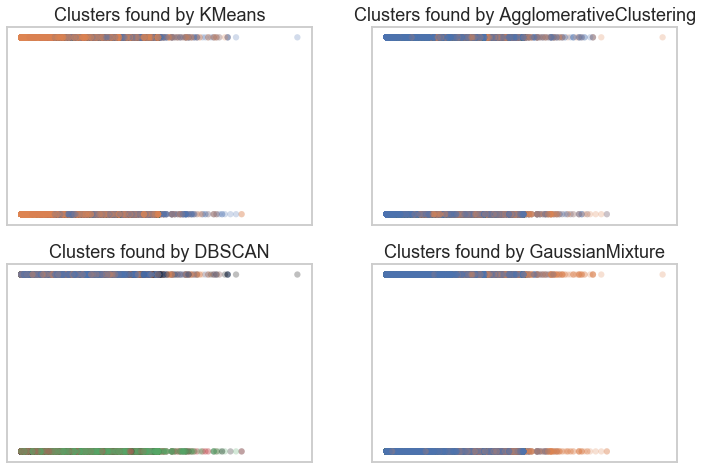

In [105]:
%%time
size = (12,8)
plt.subplots(2,2,figsize=size)
plt.subplot(2,2,1)
plot_clusters(data, cluster.KMeans, (), {'n_clusters':2})

plt.subplot(2,2,2)
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':2, 'linkage':'ward'})

plt.subplot(2,2,3)
plot_clusters(data, DBSCAN, (), {'eps':1.9335816413107338, 'min_samples':8})


plt.subplot(2,2,4)
plot_clusters(data, GaussianMixture, (), {'n_components':2, 'covariance_type':'spherical'})


In the above visualization we see the clustering groups that were identified for each method. In each of them, no clearly distinct cluster groups can be seen as the data mostly overlaps. This result explains the low Silhouette Scores and lack of clusters identified by most methods. Ultimately this indicates the data is too similar to find any clear distinctions and would do little to improve the accuracy metrics for the base Random Forest model.

* In the KMeans method we see that there is a lot of overlap between the two clusters. 


* Similarly in the Agglomerative method the data is highly overlapped almost identically to the clustering found in KMeans.


* DBSCAN has multiple color distincition likely due to the additional clusters it identified, however like all other methods it displayed a similar blending and overlap of data throughout.


* The Gaussian Mixture was perhaps slightly more distinct in terms of groupings than seen in KMeans or Agglomerative, though similar to those there are no obvious cluster separations and they tend to overlap for most of the data.

<a id="MOD4"></a>
# Modeling and Evaluation 4
### 		Summarize the Ramifications

For the KMeans clustering method there was very little impact on the base Random Forest model. A high amount of overlap was identified by multiple sources in the 2 clusters the were selected as optimal. When applied to the Random Forest model there was a 0.0004% improvement to the average accuracy of the model which is highly likely to not be statistically significant. The Sensitivity showed a 0.001% decrease in performance while the Specificity increased by a similar amount, both insignificant changes. 

Both the Agglomerative and Gaussian Mixture method results were nearly identical to the those for the KMeans method, performing slightly worse in all metrics. In terms of silhouette score the Gaussian Mixture was the best by far and displayed a slightly better visual distinctions of the clusters as well. However as seen in the other methods this ultimately had little to no impact on the base model. 

DBSCAN was unique in that the method identified more clusters than other methods however the silhouette scores were relatively low for all n-clusters identified with this method compared to others. We could also see in the visual representation that all identified clusters were highly overlapped. The results from using this on the base model also had little to no impact.

Ultimately based on the information from several sources we can assume that all clustering methods had a difficult time identifying clearly distinct clusters as the data was too similar. This of course meant the methods would do little to improve the accuracy metrics beyond what our base model was already capable of.

In terms of ramifications our initial accuracy was already quite reasonable at 81% and given the subject matter, some incorrect predictions on clients defaulting will have little to no negative impact over not using a predictive model. To further increase the effectiveness of our model is it likely we would need to aquire more data that includes additional attribute information. 

The effectiveness of a good classification algorithm is one that produces strong accuracy, sensitivity, and specificity scores through cross validation. If an effective classification model can be built, the credit company will have the ability to proactively monitor borrowers in various credit stages. The significance of identifying default or not will allow the credit card to minimize some of their losses. If early default identification occurs, the credit card company can reduce the borrower’s credit limits or preemptively work with the borrower to create new repayment plans. Both outcomes will help the credit company reduce their losses that would occur if no action were taken.

<a id="DEP"></a>
# Deployment 


* **Did you achieve your goals? If not, can you reign in the utility of your modeling?**
    * Our goals for this project were to improve the classification abilities of our base model using various clustering methods. 
    * We were unable to achieve this goal as the results were approximately the same as the base model for each method. However we can identify that this was likely due to heavy similarities in the data that lead to high amounts of overlap in any clusters that were identified.
    * While the clustering methods did not improve our base model it is still useful as a reasonably accurate predictive model on client defaults.

* **How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)?** 
    * A credit card company would want to better predict the likelihood of default for its customers, as well as identify key attributes such as education level, leading them to better clients. This would help advise the company's decisions on which clients to give credit and what credit limit to provide. It would also help the company have a better understanding of their current and future customers, helping to shape which clients to target with offers.
    
* **How would you measure the model's value if it was used by these parties?**
    * The model's value would be measured by it's accuracy in determining what clients would potentially go into default on repayment of money borrowed. Trait relationships analyzed by the model can also have value to the company, such as education level, which can offer insight into what type of clients the company should pursue to maintain a more profitable and reliable outcome.
    
* **How would you deploy your model for interested parties?**
    * We will first need to specify performance requirements for what attributes will have value to the company. 
    * Development of automated tests for the model (regression tests) to ensure the model is meeting the minimum performance requirements.
    * Over time the model and data will change therefore an evaluation process needs to be automated in order to back-test changes made to the model and see if improvements are made.
    
* **What other data should be collected?**
    * Categorized transaction data would be useful for comparing spending patterns with default risks.
    * Credit rating scores at time of application to analyze general credit risk of potential borrowers.
    * Annual income and other types of debt held by applicants/clients would allow us to calculate debt to income ratios. 
    
* **How often would the model need to be updated, etc.?**
    * Since the credit cards were based on monthly billing cycles it would be reasonable to update the model on a monthly basis. 

<a id="EXC"></a>
# Exceptional Work 


#### Yellow Brick

We used Yellow-Brick to visualize the silhouette scoring for each respective clustering method. 

#### Similarity Matrix Plot

To gain additional insight we created a similarity matrix which provides a quick look at how distinctly different the values in each client from the data are from each other. This is calculated by creating distances that represent the dimensionality of features for each client. A small distance between clients would indicate they were very similar, whereas large distances would be found for clients typically considered outliers as they have little similarity to most other clients. The distances are then converted to similarity scores with 1 representing very similar clients and 0 indicating high amounts of differences.

Running the entire data set did initally result in overloading the system as it could not create enough space for the matrix it was attempting to create. To circumvent this issue we used increasing samples of data and examined the results as seen below for 500, 5000, and 10000 clients of a total 22996.

In [16]:
df_sample_500 = df_base.head(500)
df_sample_5000 = df_base.head(5000)
df_sample_10k = df_base.head(10000)

In [28]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

n_clusters = 2
model = KMeans(init='k-means++', n_clusters=n_clusters, n_init=1).fit(df_sample_500)

# plot the similarity matrix
from sklearn.metrics import pairwise

y=model.labels_
idx_sorted = np.argsort(y,kind="quicksort")  # need to get the ordering of Y
#data_sorted = df_base[idx_sorted]  # sort the dataset by class
R = pairwise.euclidean_distances(df_sample_500)  # calculate the similarity

#transform distance to similarity
min_r = np.min(R)
max_r = np.max(R)
R = 1-(R-min_r)/(max_r-min_r)

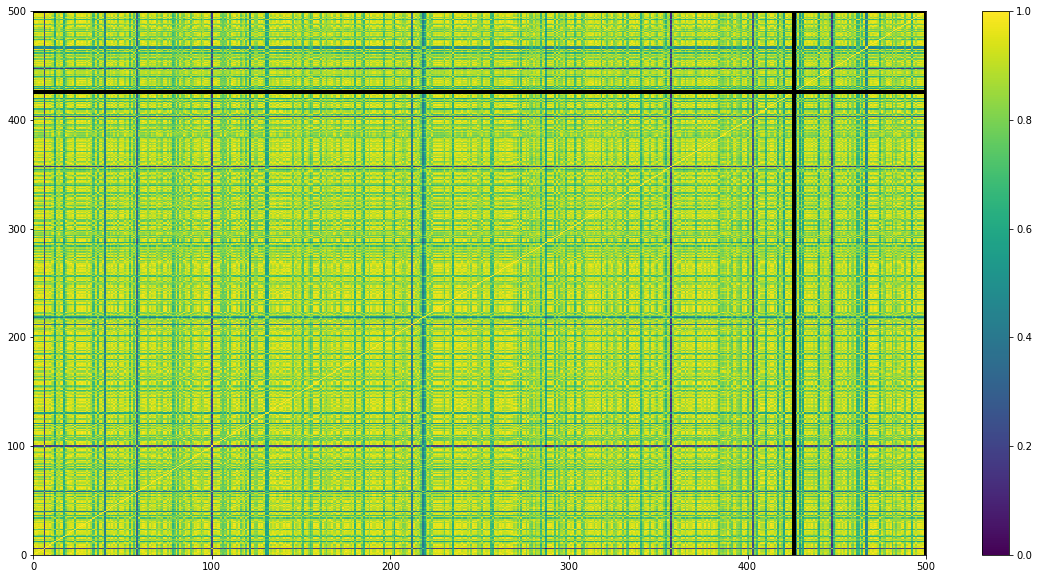

Wall time: 380 ms


In [30]:
%%time
plt.figure(figsize=(20,10))
import matplotlib.pyplot as plt
plt.pcolormesh(R)
plt.colorbar()

# plot class boundaries
bounds = np.cumsum([np.sum(y==val) for val in np.unique(y)])
for b in bounds:
    plt.plot([b,b],[0, len(y)],'k',linewidth=4)
    plt.plot([0, len(y)],[b,b],'k',linewidth=4)

plt.show()

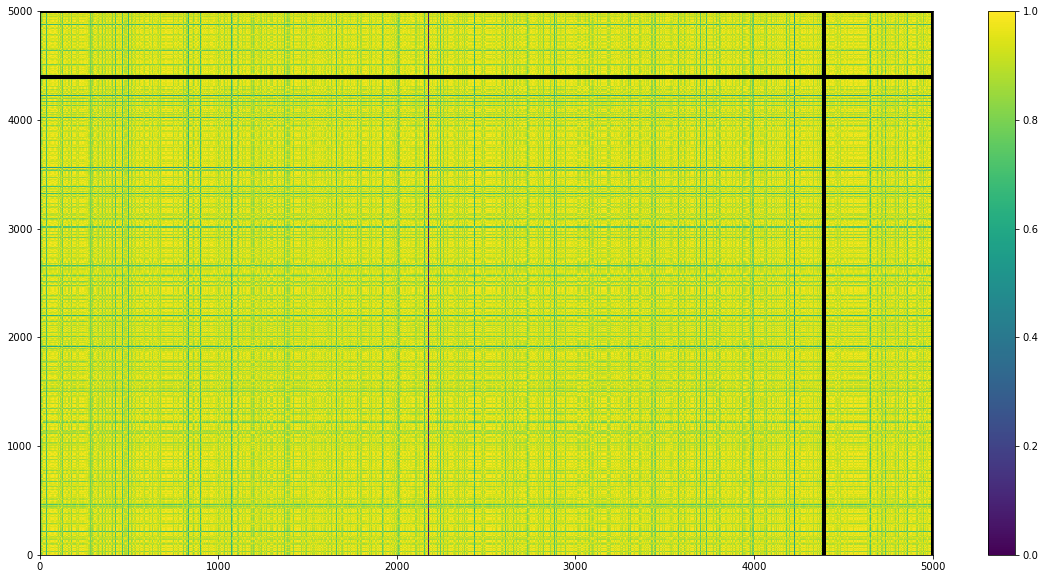

Wall time: 9.58 s


In [31]:
%%time
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

n_clusters = 2
model = KMeans(init='k-means++', n_clusters=n_clusters, n_init=1).fit(df_sample_5000)

# plot the similarity matrix
from sklearn.metrics import pairwise

y=model.labels_
idx_sorted = np.argsort(y,kind="quicksort")  # need to get the ordering of Y
#data_sorted = df_base[idx_sorted]  # sort the dataset by class
R = pairwise.euclidean_distances(df_sample_5000)  # calculate the similarity

#transform distance to similarity
min_r = np.min(R)
max_r = np.max(R)
R = 1-(R-min_r)/(max_r-min_r)

plt.figure(figsize=(20,10))
import matplotlib.pyplot as plt
plt.pcolormesh(R)
plt.colorbar()

# plot class boundaries
bounds = np.cumsum([np.sum(y==val) for val in np.unique(y)])
for b in bounds:
    plt.plot([b,b],[0, len(y)],'k',linewidth=4)
    plt.plot([0, len(y)],[b,b],'k',linewidth=4)

plt.show()

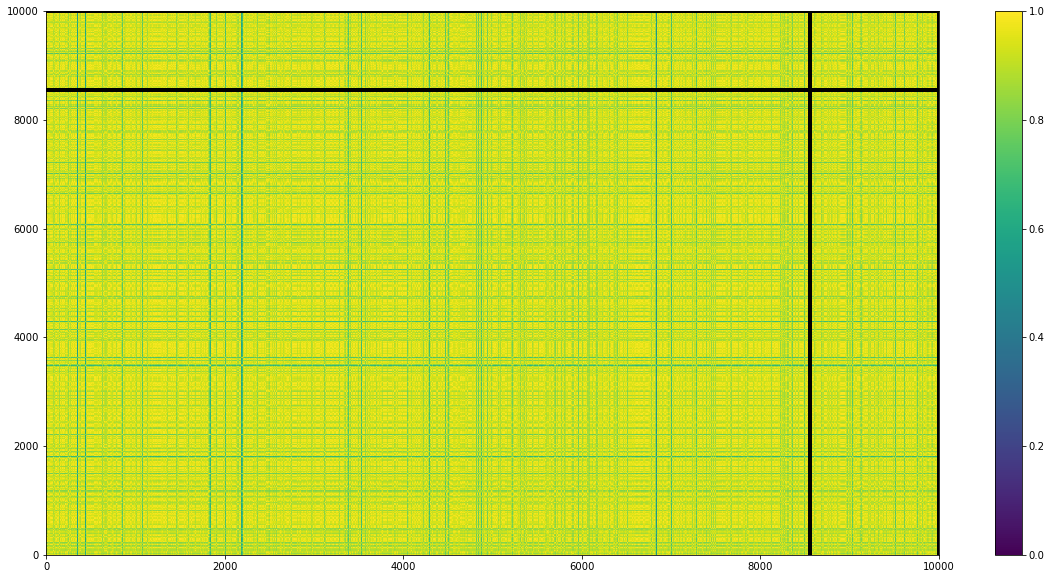

Wall time: 37.3 s


In [17]:
%%time
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

n_clusters = 2
model = KMeans(init='k-means++', n_clusters=n_clusters, n_init=1).fit(df_sample_10k)

# plot the similarity matrix
from sklearn.metrics import pairwise

y=model.labels_
idx_sorted = np.argsort(y,kind="quicksort")  # need to get the ordering of Y
#data_sorted = df_base[idx_sorted]  # sort the dataset by class
R = pairwise.euclidean_distances(df_sample_10k)  # calculate the similarity

#transform distance to similarity
min_r = np.min(R)
max_r = np.max(R)
R = 1-(R-min_r)/(max_r-min_r)

plt.figure(figsize=(20,10))
import matplotlib.pyplot as plt
plt.pcolormesh(R)
plt.colorbar()

# plot class boundaries
bounds = np.cumsum([np.sum(y==val) for val in np.unique(y)])
for b in bounds:
    plt.plot([b,b],[0, len(y)],'k',linewidth=4)
    plt.plot([0, len(y)],[b,b],'k',linewidth=4)

plt.show()

From the above charts we can see a distinct difference between the 500 sample matrix against the others. Comparing the 5000 and 10000 sample matrix shows little differences which supports the reasoning that using all 22996 data points would likely show very little difference.

Overall the results are mostly at or near 1 for all clients indicating that they are very similar to each other with some exceptions where similarity scores drop to about 0.6 for certain clients. There is little indication of clustering groups here as the pattern remains mostly consistent throughout the data. This makes sense given the results we previously found with low number of cluster groups and Silhouette Scores identified by most methods. 